In [1]:
# Citation of the following great resource
# https://www.statology.org/repeated-measures-anova-python/
# https://jbhender.github.io/Stats506/F18/GP/Group16.html
# https://www.statsmodels.org/devel/mixed_linear.html
# Author: Li Zhou, 09242020

In [2]:
#quick summary:
#For AnovaRM interpretations:
# the pharmacology affected GFP signal, lead to statistically significant differences in dosages (F(3, 9) = 15.5122, p = 0.0007)
# the pharmacology did not significant  affected mcherry signal in dosages (F(3, 9) = 0.4240, p = 0.7405)

#For Linear Mixed models interpretations:
#GFP beta coef: -2.01, 95%CI[-2.95,-1.07]
#mcherry beta coef: 0.08, 95%CI[-1.43, 1.59]

In [3]:
import numpy as np
import pandas as pd
import sys
import statsmodels
import sklearn
import scipy
print('python version:',sys.version)
print("pandas version:",pd.__version__)
print("numpy version:",np.__version__)
print('statsmodels:',statsmodels.__version__)
print('sklearn:',sklearn.__version__)
print('scipy:',scipy.__version__)
# python version: 3.8.3 | packaged by conda-forge | (default, Jun  1 2020, 16:59:10) [MSC v.1916 64 bit (AMD64)]
# pandas version: 1.0.5
# numpy version: 1.18.5
# statsmodels: 0.11.1
# sklearn: 0.23.1
# scipy: 1.3.2

python version: 3.8.3 | packaged by conda-forge | (default, Jun  1 2020, 16:59:10) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.5
numpy version: 1.18.5
statsmodels: 0.11.1
sklearn: 0.23.1
scipy: 1.3.2


In [4]:
from sklearn import preprocessing

In [5]:
#import the data
df_GFP = pd.read_csv('1EMD_normalized_ratio.csv')
# df_GFP['drug_scaled'] = preprocessing.scale(df_GFP.drug.values)

df_GFP.head()

,patient,drug,Normalized
0,p1,Control,0.711548
1,p1,EMD_10,0.780589
2,p1,EMD_25,0.241017
3,p1,EMD_50,0.038849
4,p2,Control,0.557485


In [6]:
# Test if the sample differs from a normal distribution / Gaussian.
from scipy import stats
x = df_GFP['Normalized']
k2, p = stats.normaltest(x)
alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: samples comes from a normal distribution /Gaussian. 
    print("The null hypothesis can be rejected")
    print('Probably NOT Gaussian')
else:
    print("The null hypothesis cannot be rejected")
    print('Probably Gaussian or normal distribution')

p = 0.589598
The null hypothesis cannot be rejected
Probably Gaussian or normal distribution


C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\scipy\stats\stats.py:1449: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
#perform the repeated measures ANOVA

In [8]:
from statsmodels.stats.anova import AnovaRM
#perform the repeated measures ANOVA
print('For GFP:')
print(AnovaRM(data=df_GFP, depvar='Normalized',aggregate_func='mean', subject='patient', within=['drug']).fit())
print('_*'*20)
print('_*'*20)
#(F(3, 9) = 18.2632, p = 0.0004)

For GFP:
              Anova
     F Value Num DF Den DF Pr > F
---------------------------------
drug 18.2632 3.0000 9.0000 0.0004

_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*


In [9]:
# Linear Mixed Effects Models in R and Python


In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#fit the model
mixed = smf.mixedlm("Normalized ~ drug", df_GFP, groups='patient',re_formula="~drug") #
mixed_fit = mixed.fit()
#print the summary
# print(mixed_fit.summary())
print('the residual probably Gaussian distribution if P is large:',stats.shapiro(mixed_fit.resid)[1])
print('\np value:',mixed_fit.pvalues)
mixed_fit.summary()

C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


the residual probably Gaussian distribution if P is large: 0.4988710284233093

p value: Intercept                              9.325537e-09
drug[T.EMD_10]                         7.591211e-03
drug[T.EMD_25]                         3.860697e-12
drug[T.EMD_50]                         9.508538e-10
patient Var                            2.327533e-01
patient x drug[T.EMD_10] Cov           2.611838e-01
drug[T.EMD_10] Var                     2.738664e-01
patient x drug[T.EMD_25] Cov           5.669017e-01
drug[T.EMD_10] x drug[T.EMD_25] Cov    5.172678e-01
drug[T.EMD_25] Var                              NaN
patient x drug[T.EMD_50] Cov           2.390261e-01
drug[T.EMD_10] x drug[T.EMD_50] Cov    2.943626e-01
drug[T.EMD_25] x drug[T.EMD_50] Cov    5.553715e-01
drug[T.EMD_50] Var                     2.950040e-01
dtype: float64


C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2118: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2130: ConvergenceWarning: Gradient optimization failed, |grad| = 2.349447
  warnings.warn(msg, ConvergenceWarning)
C:\Users\zhouli\Anaconda3\envs\scanpy_sfn-workshop\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2170: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\z

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
==============================================================================
Model:                    MixedLM        Dependent Variable:        Normalized
No. Observations:         16             Method:                    REML      
No. Groups:               4              Scale:                     0.0062    
Min. group size:          4              Log-Likelihood:            1.7599    
Max. group size:          4              Converged:                 No        
Mean group size:          4.0                                                 
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                            1.000    0.174  5.743 0.000  0.659  1.341
drug[T.EMD_10]                      -0.252    0.094 -2.670 0.008 -0.437 -0.067
drug[T.EMD_25]                      -0.547    0.079 -6.942 0.000 -0.702 -0.393
drug[T.EMD_50]                      -0.914    0.149 -6.117 0.000 -1.206 -0.621
patient Var                          0.115    1.223                           
patient x drug[T.EMD_10] Cov        -0.037    0.423                           
drug[T.EMD_10] Var                   0.023    0.269                           
patient x drug[T.EMD_25] Cov        -0.021    0.467                           
drug[T.EMD_10] x drug[T.EMD_25] Cov  0.010    0.187                           
drug[T.EMD_25] Var                   0.012                                    
patient x drug[T.EMD_50] Cov        -0.089    0.960                           
drug[T.EMD_10] x drug[T.EMD_50] Cov  0.029    0.349                           
drug[T.EMD_25] x drug[T.EMD_50] Cov  0.018    0.385                           
drug[T.EMD_50] Var                   0.077    0.930                           
==============================================================================

"""

In [11]:
# TCB_1, beta coef: 0.959, 95%CI[0.564,1.355],p = 1.98E-6

In [12]:
#import the data
df_GFP = pd.read_csv('1EMD_normalized_ratio.csv')
# df_GFP['drug_scaled'] = preprocessing.scale(df_GFP.drug.values)
# df['drug']=df['drug'].astype(str)
# df['patient']=df['patient'].astype(str)
df_GFP.head()

,patient,drug,Normalized
0,p1,Control,0.711548
1,p1,EMD_10,0.780589
2,p1,EMD_25,0.241017
3,p1,EMD_50,0.038849
4,p2,Control,0.557485


In [13]:
from statsmodels.formula.api import ols

# res = ols("np.log(Days+1) ~ C(Weight) + C(Duration)", data).fit()
res = ols("Normalized ~ drug", df_GFP).fit()
pw = res.t_test_pairwise("drug")
# pw.result_frame.head()

In [14]:
#ccorretion for control 1
from statsmodels.stats.multitest import multipletests
pvals = pw.result_frame['P>|t|'].values[0:3]
print(pw.result_frame['P>|t|'].index[0:3])
multipletests(pvals, alpha=0.05, method='sidak', is_sorted=False, returnsorted=False)#holm-sidak

Index(['EMD_10-Control', 'EMD_25-Control', 'EMD_50-Control'], dtype='object')


(array([False, False,  True]),
 array([0.62174967, 0.08521784, 0.00417128]),
 0.016952427508441503,
 0.016666666666666666)

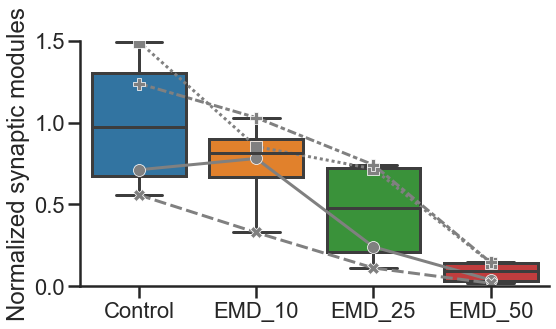

In [34]:
#plotting the figure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('1EMD_normalized_ratio.csv')#,index_col=0
df.head(1)

#convert a column number to str
# df1['is_promoted'] = df1.is_promoted.astype(str)
# df1['is_promoted'] = df1['is_promoted'].apply(str)

# df['drug']=df['drug'].apply(str)

# sns.set(font_scale=2)
sns.set_style("white",{'ytick.left':True,'xtick.bottom': True})
sns.set_context("poster") #paper, notebook, talk, and poster


g=sns.catplot(data=df,x='drug',y='Normalized',kind='box',height=5,aspect=1.65); #height=5,aspect=2
g=sns.lineplot(data=df, x='drug',y='Normalized',color = 'grey',style = 'patient',sort=False,legend=False,markers=True, dashes=True,)#hue='patient',sizes=1,
# g=sns.swarmplot(data=df,x='drug',y='Normalized',linewidth=1,color='white',edgecolor='black',size=7)
g.set(ylim=[0,1.5],xlabel='',ylabel='Normalized synaptic modules')
# plt.yscale("log")
plt.savefig("EMD.dosage11052020dpi110.png",dpi=110,bbox_inches='tight',transparent=True)